# IL027 Interdisciplinary Computer Modelling

## Lecture 9 - Introduction to Machine Learning

### Berk Onat - School of Engineering

# <hr><center><span style="color:blue">Introduction to Machine Learning</span></center><hr>

### What is Machine Learning?
"<em><b>Machine learning</b></em> is the practice of using algorithms to <b>parse data, learn from it</b>, and then make <b>predictions about the output of interest</b>. So rather than hand-coding software routines with a specific set of instructions to accomplish a particular task, the machine is <b>“trained”</b> using large amounts of data and algorithms that give it the ability to learn how to perform the task." (Reference: nvidia.com)
### What is the difference between <span style="color:red">Artificial Intelligence</span>, <span style="color:blue">Machine Learning</span>, <span style="color:green">Deep Learning</span>, and <span style="color:orange">Data Science</span>?

<img src="img/ai-machinelearning.png" style="center"/>

### This lecture covers following topics:
- Supervised Learning
   - **Linear Regression**
     - Overfitting
   - **Logistic Regression**
   - **Support Vector Machines**
   - **Confusion Matrix**
   - **Descision Trees**
     - Bootstraping
     - Bootstrap Aggregation (*Bagging*)
     - Boosting
   - **Random Forests**
   - **AdaBoost**
   - **Neural Networks**
   
For the reference, we will follow [Scikit-Learn tutorials and documentations](https://scikit-learn.org/stable/supervised_learning.html).

### Methods of Learning in Machine Learning : 
#### Supervised Learning :
This learning type uses a set of `n samples from the given dataset` and tries to predict `target` unknown properties. Supervised learning is a guided learning method where a model is optimized to predict using a given `training dataset` that has `input features or values` and `measured or expected` outcomes. 

- <b>Regression</b> : if the desired output consists of one or more continuous variables and prediction will be done to find the unknown ones using a dataset, then this learning method is called `regression`. 
- <b>Classification</b> : if the desired outputs are `descrite values` or `labels` such as the label `dog` for a dog image and `cat` for a cat image, than this prediction problem is called a `classification`. A trained model in this type is a `Classifier` and the model is optimization using one or more continuous or non-continuous input variables with `labeled` target output properties. 

#### Unsupervised Learning :
In unsupervied training, the given data does not include and target values or labels. This typr of learning method is used to identify similar groups of data in given dataset or to determine the distribution of the data in given input data space. The examples of unsupervised learning models can be `encoder-decoder` learners such as `autoencoders` and `self-organized maps`.

In [1]:
using ScikitLearn
using PyCall
using PyPlot
using ScikitLearn.CrossValidation: train_test_split
using ScikitLearn.CrossValidation: cross_val_score
using ScikitLearn.CrossValidation: cross_val_predict
import DataFrames
import DecisionTree
@pyimport matplotlib.colors as mplc
@pyimport matplotlib.image as mpimg
@sk_import preprocessing: (StandardScaler, LabelEncoder, PolynomialFeatures)
@sk_import datasets: (make_moons, make_circles, make_classification)
@sk_import svm: (SVC, SVR)
@sk_import metrics: (accuracy_score, classification_report, confusion_matrix)
using ScikitLearn.Utils: meshgrid
using ScikitLearn.Pipelines: Pipeline

## Linear Regression

This methods is intended for regression in which the target value is expected to be a linear combination of the input variables. If $\hat y$ is predicted value than,

$$ \hat y(w,x) = w_0 + w_1x_1 + w_2x_2 + ... +w_px_p $$

We will refer $w = (w_1,w_2,...,w_p)$ as the `weights` of the model now on. 
`LinearRegression` module of the package fits a linear model with coefficients $w$ to minimize the residual sum of squares between the observed responses $y$ in the dataset, and the responses predicted $\hat y = Xw$ by the linear approximation. This will be calculated with

$$ \min_{w}(\left\lVert Xw-y \right\rVert_{2} )^{2}$$


Let's generate a sample data to test `LinearRegression`. Here we take random $X$ values and use  

$$ true\_fun(X) = 1.5X + 2$$ 

as the function to produce true $y$ values with some random additions.

In [2]:
n_samples=100 # number of samples in the dataset
srand(42) # seed for the random number generator

true_fun(X) = 1.5 * X + 2.0

x = sort(rand(n_samples))
y = true_fun(x) + randn(n_samples) * 0.1
y;

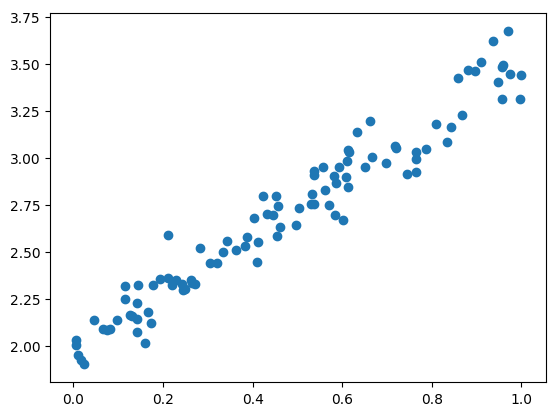

PyObject <matplotlib.collections.PathCollection object at 0x7f36cdc26cc0>

In [3]:
scatter(x,y)

We load the `LinearRegression` module of scikit-learn with the following statement. Note the difference of loading from standard Julia `import/using`. This is only dedicated to the Python interface that `ScikitLearn.jl` Julia package uses, hence `sk` is <b>SciKit</b> in `sk_import`.

In [4]:
@sk_import linear_model: LinearRegression

PyObject <class 'sklearn.linear_model.base.LinearRegression'>

Another very useful function that scikit-learn provides is the `train_test_split` which is a ready code to split data into training and test datasets. Here, the function needs $X$ and $y$ values as well as the splitting percentage with `test_size`. We defined a split of 60% to test dataset and 40% to training below with `test_size=0.6`.

In [5]:
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)
x_train;

Fitting a model is as easy as to call `fit!` throughout this package. This function can also accept compatible modules from other Julia packages such as `DecisionTrees.jl`. We will see them later on in this lecture.

In [6]:
fit!(lr, hcat(x_train), y_train)

PyObject LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This does not print anything about how the fitting is done. To see the predictions and the accuracy of the model, we need to call `predict`with test dataset and call `score` with true $y$ values with `y_test`.

In [7]:
y_pred = predict(lr, hcat(x_test));

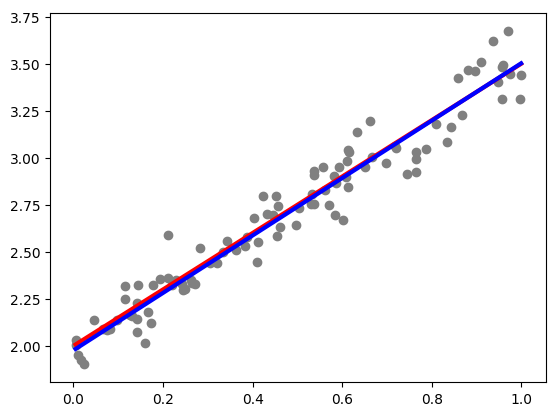

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f36cdbceac8>

In [8]:
y_pred_all = predict(lr, hcat(x))
scatter(x,y, color="gray")
plot(x, true_fun(x), color="red", linewidth=3)
plot(x,y_pred_all, color="blue", linewidth=3)

Accuracy is defined with the mean number of equal predictions to the actual values. In short, 

$$ accuracy(y,\hat y) = \left(\sum_i^N \delta(\hat y_i - y_i\right)) / N$$

here, `N` is the number of samples. We can calculate the accuracy with `score`.

In [9]:
accuracy = score(lr, hcat(x_test), y_test)
println("Accuracy:", accuracy)

Accuracy:0.9393198547707428


We can also calculate the accuracies of subsets of the test dataset. For this purpose, we will use `cross_val_score` function. Here `cv` is the number of sub-datasets to check cross-validation.

In [10]:
scores = cross_val_score(lr, hcat(x_test), y_test, cv=3)
for scor in scores
    println("Cross-Validation Scores: ",scor)
end

Cross-Validation Scores: 0.9522245865094745
Cross-Validation Scores: 0.8647502103712068
Cross-Validation Scores: 0.9406231167654404


If the accuracy is very high but the variance between the cross-validations and the total accuracy is substantially different, we will call this fitting an overfitting. We will always revisit the accuracy and scores to understand the quality of fitting in every model fitting.

## Underfitting and Overfitting

According to the model we select and the parameters of the fitting and complexity size of the problem, we can easily have very bad predictions or very good predictions but only for the training dataset. In the case of bad predictions, we may have an underftiing in the model that can not capture the complexitiy of the problem. If we have very accurate predictions in training dataset but have much pure results for the test (non-trained) results, then our model might be effected with overfitting. 

Here is an example that we can analyse and better understand. 

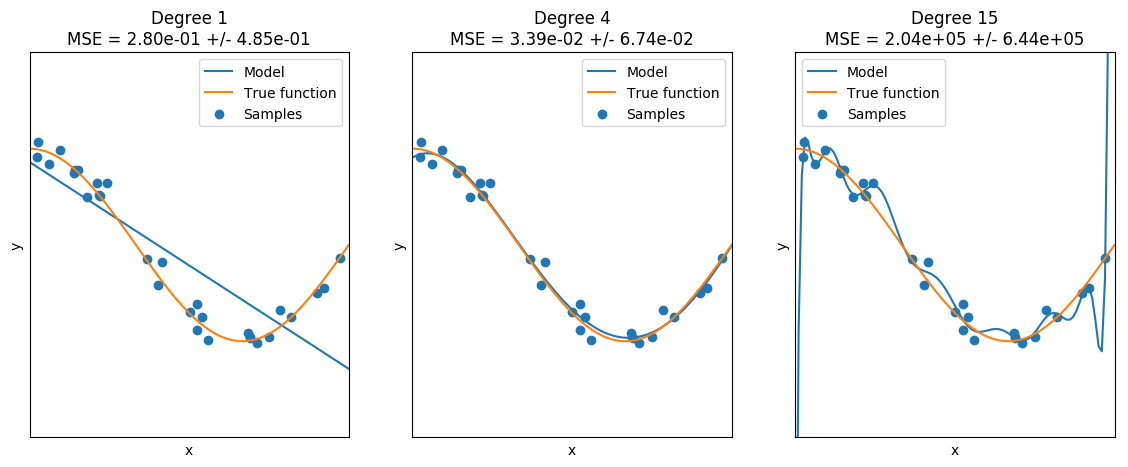

In [11]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos.(1.5 * pi * X)
X = sort(rand(n_samples))
y = true_fun(X) + randn(n_samples) * 0.1

figure(figsize=(14, 5))
for (i, degree) in enumerate(degrees)
    ax = subplot(1, length(degrees), i)
    setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=false)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    fit!(pipeline, hcat(X), y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, hcat(X), y, scoring="mean_squared_error", cv=10)

    X_test = range(0, 101)*0.01
    plot(X_test, predict(pipeline, hcat(X_test)), label="Model")
    plot(X_test, true_fun(X_test), label="True function")
    scatter(X, y, label="Samples")
    xlabel("x")
    ylabel("y")
    xlim((0, 1))
    ylim((-2, 2))
    legend(loc="best")
    title(@sprintf("Degree %d\nMSE = %.2e +/- %.2e", degree, -mean(scores), std(scores)))
end

### Real Life Example: Boston Housing Data (boston.csv)
This is a copy of UCI ML housing dataset. [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)


In [12]:
boston = DataFrames.readtable("boston.csv")
DataFrames.head(boston)

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax,PTRatio,Black,LStat,MedV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [13]:
mapper1 = DataFrameMapper([
        (:Crim, nothing),
        (:Zn, nothing),
        (:Indus, nothing),
        (:Chas, nothing),
        (:NOx, nothing),
        (:Rm, nothing),
        (:Age, nothing),
        (:Dis, nothing),
        (:Rad, nothing),
        (:Tax, nothing),
        (:PTRatio, nothing),
        (:Black, nothing),
        (:LStat, nothing),
        ])

mapper2 = DataFrameMapper([
        (:MedV, nothing)
        ])

boston_data = fit_transform!(mapper1, copy(boston))
boston_target = fit_transform!(mapper2, copy(boston))
boston_data;

### Task 1: Apply Linear Regression to Boston Data.

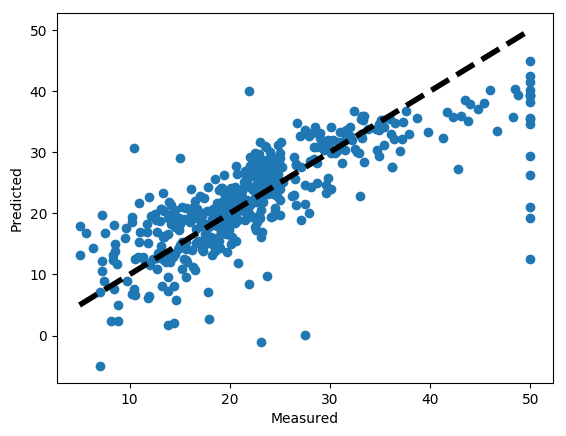

PyObject Text(24.000000000000007, 0.5, 'Predicted')

In [14]:
# Your code here!
lr = LinearRegression()
y = boston_target
predicted = cross_val_predict(lr, boston_data, y, cv=10)

scatter(y, predicted)
plot([minimum(y), maximum(y)], [minimum(y), maximum(y)], "k--", lw=4)
xlabel("Measured")
ylabel("Predicted")

## Logistic Regression

Although its name includes <b>regression</b>, and the model is a linear model, it is used for <b>classification</b> rather than <b>regression</b>. The model uses <b>logistic function</b>,

$$ f(x) = {L \over {1 + e^{-k(x-x_0)}}}$$

to determine the probabilities describing the possible outcomes of a single trial. Using this function, the model minimizes the following problem:

$$ \min_{w,c}\left(\sum_i^N log(exp((\left\lVert Xw-y \right\rVert_{2} )))^{2} + \alpha(\left\lVert w \right\rVert_2)^{2}\right)$$

In [15]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model.logistic.LogisticRegression'>

In [16]:
function classifier_model_fit_and_plot(datasets,classifiers,names,textsize,standardscale=false,confusionmatrix=false)
    h=0.02
    i = 1
    tsize = parse(Int64,textsize)
    for ds in datasets
        # preprocess dataset, split into training and test part
        X = ds[1]; y = ds[2]
        if standardscale
            X = fit_transform!(StandardScaler(), X)
        end
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        
        x_min, x_max = minimum(X[:, 1]) - .5, maximum(X[:, 1]) + .5
        y_min, y_max = minimum(X[:, 2]) - .5, maximum(X[:, 2]) + .5
        xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)
        
        # just plot the dataset first
        cm = PyPlot.cm[:RdBu]
        cm_bright = mplc.ListedColormap(["#FF0000", "#0000FF"])
        ax = subplot(length(datasets), length(classifiers) + 1, i)
        #Plot the training points
        ax[:scatter](x_train[:, 1], x_train[:, 2], c=y_train, cmap=cm_bright)
        # and testing points
        ax[:scatter](x_test[:, 1], x_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6)
        ax[:set_xlim](minimum(xx), maximum(xx))
        ax[:set_ylim](minimum(yy), maximum(yy))
        ax[:set_xticks](())
        ax[:set_yticks](())
        ax[:set_xlabel]("x")
        ax[:set_ylabel]("y")
        i += 1
        for (name, clf) in zip(names, classifiers)
            ax = subplot(length(datasets), length(classifiers) + 1, i)
            
            fit!(clf, x_train, y_train)
            predicted = predict(clf, x_test)
            if confusionmatrix
                println("Classification report for classifier ", classification_report(y_test, predicted))
                println("Confusion matrix: ",confusion_matrix(y_test, predicted))
            end
            scor = score(clf, x_test, y_test)
        
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            try 
                # Not implemented for some
                z = decision_function(clf, hcat(xx[:], yy[:]))
            catch
                z = predict_proba(clf, hcat(xx[:], yy[:]))[:, 2]
            end
            # Put the result into a color plot
            z = reshape(z, size(xx)...)
            ax[:contourf](xx, yy, z, cmap=cm, alpha=.8)
        
            # Plot also the training points
            ax[:scatter](x_train[:, 1], x_train[:, 2], c=y_train, cmap=cm_bright)
            # and testing points
            ax[:scatter](x_test[:, 1], x_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6)
        
            ax[:set_xlim](minimum(xx), maximum(xx))
            ax[:set_ylim](minimum(yy), maximum(yy))
            ax[:set_xticks](())
            ax[:set_yticks](())
            ax[:set_title](name, size=textsize)
        
            ax[:text](maximum(xx) - .3, minimum(yy) + .3, @sprintf("%.2f", scor), 
                size=tsize, horizontalalignment="right")
            i += 1
        end
    end
end

classifier_model_fit_and_plot (generic function with 3 methods)

In [17]:
x_data, y_data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                     random_state=1, n_clusters_per_class=1)
srand(42)
x_data += 2 * rand(size(x_data)...)
datasets = [(x_data, y_data),
            make_moons(noise=0.3, random_state=0)]

2-element Array{Tuple{Array{Float64,2},Array{Int64,1}},1}:
 ([0.0168796 1.1856; 1.78616 0.949819; … ; 1.23813 1.55829; 0.986005 3.32883], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1  …  0, 1, 0, 0, 1, 0, 1, 1, 0, 1])   
 ([0.031595 0.986988; 2.1151 -0.046244; … ; -1.3185 0.423112; -1.29682 0.184147], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

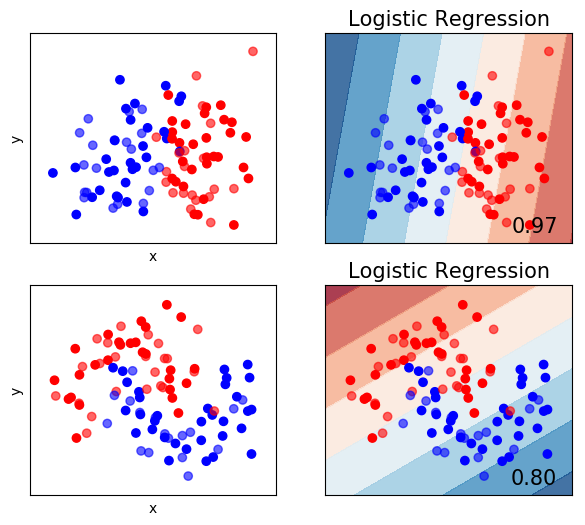

In [18]:
clf = LogisticRegression()
classifiers = [clf]
names = ["Logistic Regression"]

fig = figure(figsize=(7, 6))
classifier_model_fit_and_plot(datasets,classifiers,names,"15",true)

## Support Vector Machines (SVM)

Given training vectors $x_i$ i=1,...,n in two classes, and a vector $y = {-1,1}^n$. Support Vector Machines solves the following problem:

$$ \min_{w,b,\zeta}\left(\sum_i^n \zeta_i + {1\over 2} w^Tw\right)$$

where,

$$ y_i (w^T\phi(x_i)+b) \geq 1 - \zeta_i \space\space\space\space, \zeta_i \geq 0 $$

Here, $K(x_i,x_j) = \phi(x_i)^T\phi(x_j)$ is the <b>Kernel function</b> of SVM and can be defined with the following examples:

- <b>Linear Kernel</b>
$$K(x_i, x_j) = x_i^T x_j$$
- <b>Radial Basis Function (RBF) Kernel</b>
$$K(x_i, x_j) =  exp(-\gamma ||x_i-x_j||^2)$$

If $\gamma = \sigma^{-2}$, the kernel is known as the Gaussian kernel with variance $\sigma^2$.

<img src="img/svm.png" style="center"/><br>
The $y_i$ support vectors are show as the lines closer to the data points with large margin with a hyperplane that splits the space into two sections. At left we can see possible hyperplanes that can be selected closer to data points. At right the optimal hyperplane is fitted using the above minimization problem. 

For <b>classification</b>, SVC  and for <b>regression</b> SVR functions can be used in Scikit-Learn package.

In [19]:
names = ["Linear SVM", "RBF SVM"]
classifiers = [SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1)]

x_data, y_data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                     random_state=1, n_clusters_per_class=1)
srand(42)
x_data += 2 * rand(size(x_data)...)

datasets = [(x_data, y_data),
            make_moons(noise=0.3, random_state=0)]
datasets;

Classification report for classifier               precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.61      1.00      0.76        14

   micro avg       0.78      0.78      0.78        40
   macro avg       0.80      0.83      0.77        40
weighted avg       0.86      0.78      0.78        40

Confusion matrix: [17 9; 0 14]
Classification report for classifier               precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.76      0.93      0.84        14

   micro avg       0.88      0.88      0.88        40
   macro avg       0.86      0.89      0.87        40
weighted avg       0.89      0.88      0.88        40

Confusion matrix: [22 4; 1 13]


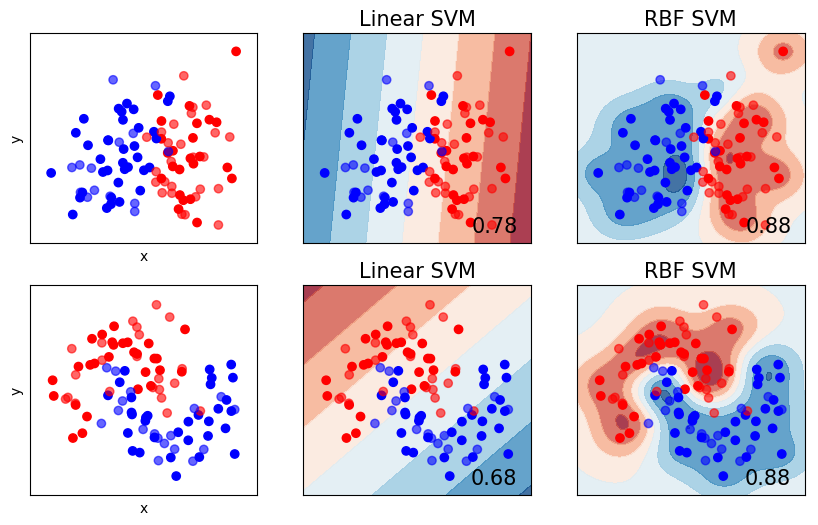

Classification report for classifier               precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.63      0.67      0.65        18

   micro avg       0.68      0.68      0.68        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.68      0.68      0.68        40

Confusion matrix: [15 7; 6 12]
Classification report for classifier               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.84      0.89      0.86        18

   micro avg       0.88      0.88      0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40

Confusion matrix: [19 3; 2 16]


In [20]:
fig = figure(figsize=(10, 6))
classifier_model_fit_and_plot(datasets,classifiers,names,"15",true,true)

In [21]:
function swiss_roll(n_samples, random=0.0, features=[0 1])
    srand(0)
    t1 = 1.5 * pi * (1.0 + 3 * rand(n_samples))
    x1 = t1 .* cos.(t1)
    y1 = t1 .* sin.(t1)
    l1 = fill(features[1],n_samples)
    a1=hcat(x1,y1)
    t2 = -1.1 * pi * (1.0 + 4 * rand(n_samples))
    x2 = 1.15 .* t2 .* sin.(t2)
    y2 = 1.15 .* t2 .* cos.(t2)
    l2 = fill(features[2],n_samples)
    a2=hcat(x2,y2)
    x=vcat(a1,a2)
    y=vcat(l1,l2)
    x[:,1] = x[:,1] + rand(2*n_samples)*random
    x[:,2] = x[:,2] + rand(2*n_samples)*random
    return x, y
end

swiss_roll (generic function with 3 methods)

In [22]:
n=200
(s_X, s_Y) = swiss_roll(n, 1.0)

([-12.1633 -9.50557; 5.6997 -16.3641; … ; -18.3442 4.26688; -5.0558 -0.62116], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

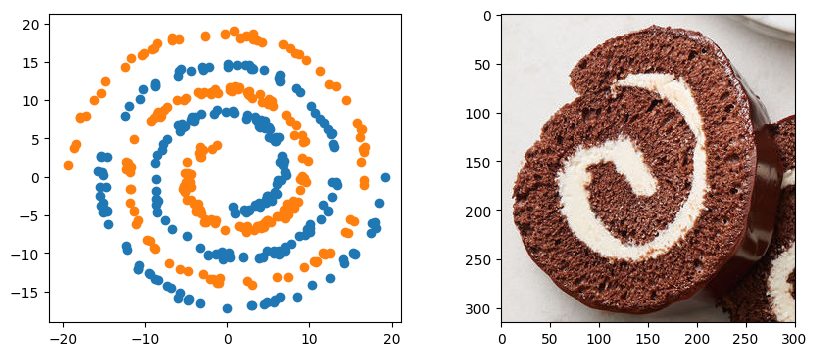

PyObject <matplotlib.image.AxesImage object at 0x7f36cd645748>

In [23]:
figure(figsize=(10, 4))
ax = subplot(1,2,1)
ax[:scatter](s_X[1:n,1],s_X[1:n,2])
ax[:scatter](s_X[n+1:2*n,1],s_X[n+1:2*n,2])
ax = subplot(1,2,2)
img = imread("img/swissroll.png")
ax[:imshow](img)

### Task 2: Use swiss_roll function to produce data and apply SVM. Find the best fit by changing C and gamma values.

- Try C=1, C=10, C=100, C=1000 :Penalty parameter C of the error term
- Try gamma=0.1, 0.2, 0.5, 1.0, and "scale" : Kernel coefficient for ‘rbf’,
   - if gamma="scale" is passed then it uses 1 / (n_features * X.std()) as value of gamma. 

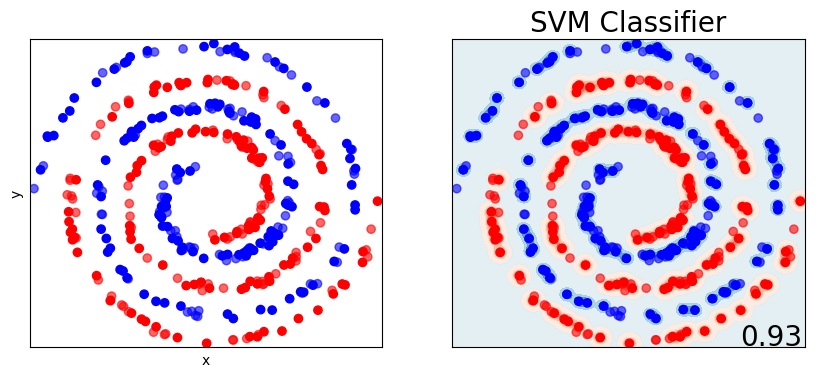

In [24]:
clf = SVC(gamma=2., C=1.)

classifiers = [clf]
names = ["SVM Classifier"]
datasets = [(s_X,s_Y)]

figure(figsize=(10, 4))
classifier_model_fit_and_plot(datasets,classifiers,names,"20")

### Confusion Matrix

Confusion Matrix can be defined as the figure below. The Positive/Negative label refers to the predicted outcome and the True/False refers to the actual outcome. Lets say we have an experiment and the True outcome is <b>Positive</b> (1) but we predicted the outcome as <b>Negative</b> (0). Than the confusion matrix will show it in <b>False/Negative (FN)</b> section. Think if this experiment is related to a cancer treatment and outcome of our prediction may effect the treatment.  

<img src="img/confusion-matrix.png" style="center"/><br>
<b><center>TP = True Positive<br>
TN = True Negative<br>
FP = False Positive<br>
FN = False Negative<br></b></center>

### Confusion Metrics
We can calculate valuable information about <b>Accuracy, Misclassication</b> and so on from the confusion matrix as following:
1. <b>Accuracy</b> (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
2. <b>Misclassification</b> (all incorrect / all) = (FP + FN) / (TP + TN + FP + FN)
3. <b>Precision</b> (true positives / predicted positives) = TP / (TP + FP)
4. <b>Sensitivity aka Recall</b> (true positives / all actual positives) = TP / (TP + FN)
5. <b>Specificity</b> (true negatives / all actual negatives) = TN / (TN + FP)

### Task 3: Calculate confusion metrics for swiss_roll data with best fitting parameters.
Have an hands-on coding here and let's calculate those confusion metrics above.

In [25]:
confmat = [135 5; 50 90]
# TP =  135
# FP = 5
# FN = 50
# TN = 90

2×2 Array{Int64,2}:
 135   5
  50  90

In [26]:
Accuracy = sum(diag(confmat))/sum(confmat) * 100
println("Accuracy : ",Accuracy, " %")

Accuracy : 80.35714285714286 %


In [27]:
Misclassification = (confmat[1,2]+confmat[2,1])/sum(confmat) * 100
Precision = confmat[1,1]/sum(confmat[1,:]) * 100
Recall = confmat[1,1]/sum(confmat[:,1]) * 100
Specificity = confmat[2,2]/sum(confmat[:,2]) * 100
println("Misclassification : ",Misclassification, " %")
println("Precision : ",Precision, " %")
println("Sensitivity/Recall : ",Recall, " %")
println("Specificity : ",Specificity, " %")

Misclassification : 19.642857142857142 %
Precision : 96.42857142857143 %
Sensitivity/Recall : 72.97297297297297 %
Specificity : 94.73684210526315 %


## Decision Trees

Tree based splitting algorithms are effective in classification models. They have high accuracy when compared to Logistic Regression models. The idea behind the decision trees is to split the data into seperate branches according to the given values and features. Here is an example on how it works.

We would like to have an smartphone app that shows whether it is good to play tennis today according to the given featres of whether: The <b>Outlook</b>, <b>Temperature</b>, <b>Humidity</b>, and <b>Wind</b>. Luckily, we have data from previous good and bad days for playing tennis in our data table below.
<img src="img/tennis-data.png" style="center"/>

We can determine a tree based decision graph using this information as follows:

<img src="img/tennis-small.png" style="center"/>


In [28]:
#using GraphViz
tennis = DataFrames.readtable("tennis.csv")
DataFrames.head(tennis)
#tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
1,sunny,hot,high,weak,no
2,sunny,hot,high,strong,no
3,overcast,hot,high,weak,yes
4,rain,mild,high,weak,yes
5,rain,cool,normal,weak,yes
6,rain,cool,normal,strong,no


In [29]:
outlook = ["sunny", "overcast", "rain"]
temperature = ["hot", "mild", "cool"]
humidity = ["high", "normal"]
wind = ["weak", "strong"]
playTennis = ["no", "yes"]

2-element Array{String,1}:
 "no" 
 "yes"

In [30]:
le1 = LabelEncoder()
outlook_encoder = fit!(le1,outlook)
outlook_encoder[:classes_]

PyObject array(['overcast', 'rain', 'sunny'], dtype='<U8')

In [31]:
outlook_encoder[:transform](["sunny", "overcast", "rain"])

3-element Array{Int64,1}:
 2
 0
 1

In [32]:
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
outlook_encoder = fit!(le1,outlook)
temperature_encoder = fit!(le2,temperature)
humidity_encoder = fit!(le3,humidity)
wind_encoder = fit!(le4,wind)
play_encoder = fit!(le5,playTennis)

tennis_data = hcat(
    outlook_encoder[:transform](tennis[:Outlook]),
    temperature_encoder[:transform](tennis[:Temperature]),
    humidity_encoder[:transform](tennis[:Humidity]),
    wind_encoder[:transform](tennis[:Wind])
)
tennis_target=play_encoder[:transform](tennis[:PlayTennis])
tennis_data

14×4 Array{Int64,2}:
 2  1  0  1
 2  1  0  0
 0  1  0  1
 1  2  0  1
 1  0  1  1
 1  0  1  0
 0  0  1  0
 2  2  0  1
 2  0  1  1
 1  2  1  1
 2  2  1  0
 0  2  0  0
 0  1  1  1
 1  2  0  0

In [33]:
clsf = DecisionTree.DecisionTreeClassifier() # This classifier is Julia DecisionTree native one
#fit!(clsf, tennis_data, tennis_target)
model_fit = DecisionTree.build_tree(tennis_target, tennis_data)

Decision Tree
Leaves: 7
Depth:  4

In [34]:
# pretty print of the tree, to a depth of 5 nodes (optional)
DecisionTree.print_tree(model_fit, 5)

Feature 1, Threshold 0.5
L-> 1 : 4/4
R-> Feature 3, Threshold 0.5
    L-> Feature 1, Threshold 1.5
        L-> Feature 4, Threshold 0.5
            L-> 0 : 1/1
            R-> 1 : 1/1
        R-> 0 : 3/3
    R-> Feature 4, Threshold 0.5
        L-> Feature 1, Threshold 1.5
            L-> 0 : 1/1
            R-> 1 : 1/1
        R-> 1 : 3/3


### Let's try performance of Decision Trees with Swiss-roll example.

In [35]:
n=200
(s_X, s_Y) = swiss_roll(n, 1.0)

([-12.1633 -9.50557; 5.6997 -16.3641; … ; -18.3442 4.26688; -5.0558 -0.62116], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(s_X, s_Y, test_size=0.7)

4-element Array{Array,1}:
 [-0.491648 -10.7854; 9.6673 -6.87179; … ; -3.3489 3.88748; -3.14096 10.8165]
 [-5.76402 6.03627; 12.7928 -2.60317; … ; -10.61 10.1897; 7.08243 -9.65362]  
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1  …  0, 0, 1, 0, 1, 0, 1, 0, 1, 1]             
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0  …  0, 1, 1, 1, 1, 1, 1, 0, 0, 0]             

In [37]:
clf = DecisionTree.DecisionTreeClassifier()
fit!(clf, x_train, y_train)

DecisionTreeClassifier
max_depth:                -1
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 23
Depth:  9


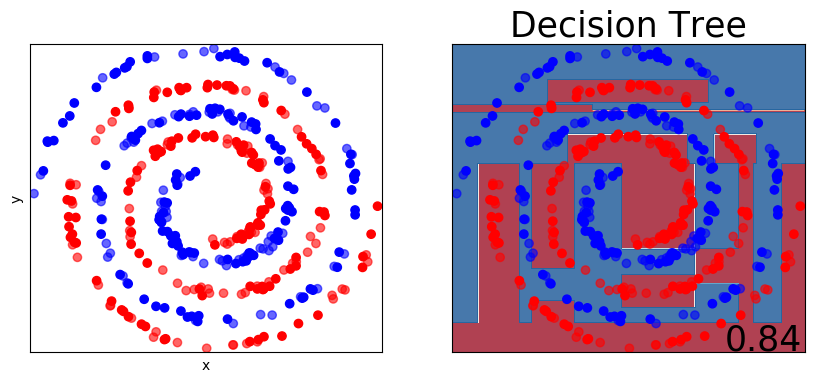

Classification report for classifier               precision    recall  f1-score   support

           0       0.86      0.82      0.84        84
           1       0.81      0.86      0.83        76

   micro avg       0.84      0.84      0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160

Confusion matrix: [69 15; 11 65]


In [38]:
clf = DecisionTree.DecisionTreeClassifier()
classifiers = [clf]
names = ["Decision Tree"]
datasets = [(s_X,s_Y)]

figure(figsize=(10, 4))
classifier_model_fit_and_plot(datasets,classifiers,names,"25",false,true)

## How to improve Decision Tree accuracy?

It seams that the accuracy of the Decision Tree model is highly dependent on the dataset. Whenever we fit the decision tree in the above example we get a new accuracy and these accuracies may not be high. There are methods to fix this and improve the accuracy of this tree method. We call them ensembles. There are well knows ensembles to improve the Decision Tree models such as <b>Bootstrap Aggregation (Bagging)<b/> and <b>Boosting</b>.

## Bootstraping

Bootstrap is to initialize the dataset that we work on. So far we were using one training dataset for our models, the <b>total population</b> besides the test dataset. 

<b>Bootstraping</b> is all about randomly selecting sub samples of the main training dataset. By generating different randomly sampled sub-sets, we can analyse the variance of the data. If we select three random samples from a dataset, the output may looklike the following figure. Check how many red, green and yellow elements in each sub-sample. The different distribution of these features may effect the fit and show varience in the data.

<img src="img/bootstraping.png" style="center"/>

We may work any one of the selected dataset of all of these sub datasets with the same model and <b>aggregate</b> tehm or use them for <b>boosting</b> the accuracy.

<b><span style="color:red">Note: We used random sub-sampling in cross-validation with `cv=3` in `cross_val_score` to split the test dataset into three sub samples!</span></b>

## <span style="color:blue">B</span>ootstrap <span style="color:blue">Agg</span>regation (or in short <span style="color:blue">Bagging</span>)

We can use randomly selected sub samples of the main dataset using <b>bootstrapping</b> and apply our model to these sets independently. Using an aggregation the outcomes of each predictions, we can increase the accuracy. This is the main idea in <b>Bootstrap Aggregation</b>. In this ensemble method, high accurate and deep desicion trees are used and rather than optimizing the parameters of individual trees, the main purpose is to find an optimum number of sub trees. An example below is good for practicing this. 

<img src="img/bagging.png" style="center"/>

Here, each <b>Tree 1</b>, <b>Tree 2</b>, and <b>Tree 3</b> are fitted independently with many number of leafs, high depth and without pruning the leafs. The final prediction is calculated with the average of all the trees that are combined in this method.

## Random Forests

Simiar to the <b>Bagging</b> ensemble, each tree is fitted by selecting a random sample from the training data, bootstrapping. However in <b>Random Forests</b> ensemble, the tree splitting is not constructed using the best split for all features, instead it is constructed by the best split among a random subset of the features. While mostly this randomness increases the bias of the model, with the averaging of the predictions of trees its varience decreases.

## Extremely Randomized Trees

This ensemble uses the similar random subset of cadidate feature selection but further increases the randomness in the splitting process. In the splitting, instead of using the most discriminative value for splitting, the values are drawn randomly for each candidate feature and best of these values is selected as the splitting value. This again increases the bais of the model larger than in random forests but reduces its varience.

Below, we will load the Ranfom Forest and Extremely Randomized Trees Classifiers and test these models on swiss role dataset.

In [39]:
#@sk_import ensemble: (RandomForestClassifier, ExtraTreesClassifier)
@sk_import ensemble: ExtraTreesClassifier

PyObject <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>

In [40]:
h = 0.02  # step size in the mesh

names = ["Decision Tree", "Random Forest", "Extra Random Trees"]
classifiers = [
    DecisionTree.DecisionTreeClassifier(pruning_purity_threshold=0.8),
    DecisionTree.RandomForestClassifier(n_trees=10),
    #RandomForestClassifier(n_estimators=10, max_depth=nothing, min_samples_split=2, random_state=0),
    ExtraTreesClassifier(n_estimators=10, max_depth=nothing, min_samples_split=2, random_state=0)
]

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            ];

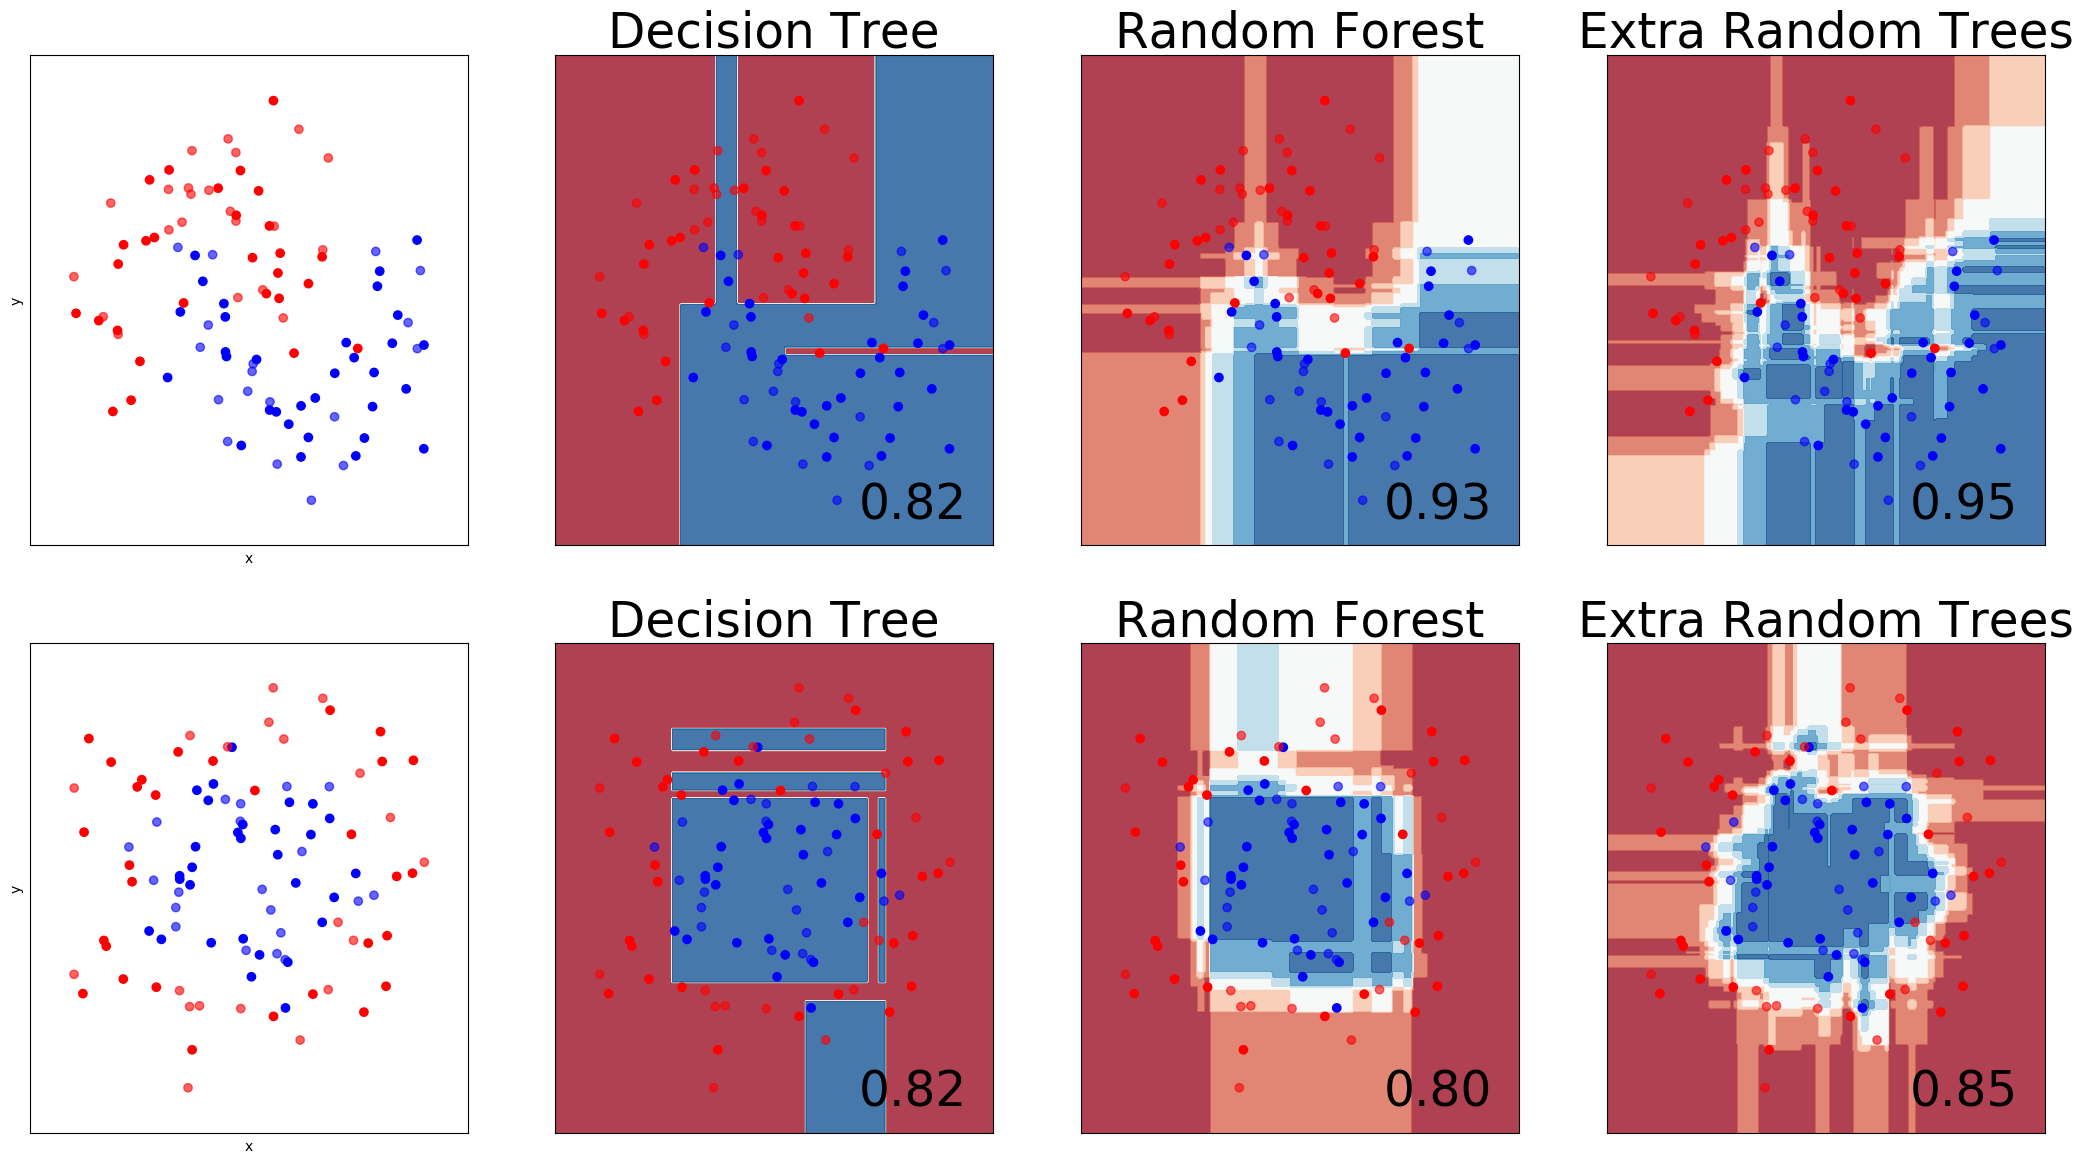

In [41]:
fig = figure(figsize=(26, 14))
classifier_model_fit_and_plot(datasets,classifiers,names,"35",true)

## Boosting

In <b>boosting</b> method, weak learners are used (with <b>random samples</b>) to increase the accuracy of the final prediction in a sequential way. When there is misclassification in the data at a previous weka learner, the weights of the misclassified data is increased and others decreases so that in the next learner fitting the accuracy of these classification can be increased. Here is an example below,

<img src="img/boosting.png" style="center"/>

In this example, we start with a decision tree classifier, <b>Tree 1</b> and use the outcome of the predictions in second <b>Tree 2</b> by decreasing the weight of the better classified values and increase the ones for bad predictions. See the smaller red and green elements and larger ones. We apply the same method iteratively until the precision does not change much. In the last stage we can see that an accumulated weighted decision trees find a better classification.

## AdaBoost

A well known succesful application of this method is <b>AdaBoost</b>. In this method, weak learners are used with weighted training data as described above. In each weak learner estimation the missclassification rate (training error rate) of the predictions are calculated with

$$ t_{error} = \left\{ 
\begin{aligned}
0, target &= prediction \\
1, target &\neq prediction 
\end{aligned}
\right.$$

and error in the misclassification is determined with weighted average using

$$ Error = {\sum w_i t^{error}_i \over \sum w }$$.

A stage value is calculated for the trained model at each step and is used in updating the weights of the model. The stage value can be calculated with

$$ Stage = \ln({ {1 - Error} \over {Error}}) $$

and the weights than can be updated as following

$$ w = w * exp(Stage \space*\space t_{error}) $$

In [42]:
#@sk_import ensemble: AdaBoostClassifier
clf = DecisionTree.AdaBoostStumpClassifier(n_iterations=30)

AdaBoostStumpClassifier
n_iterations: 30
coeffs:       nothing
classes:      nothing
ensemble:     nothing


In [43]:
adaset = make_circles(noise=0.2, factor=0.5, random_state=1)

([-0.382891 -0.09084; -0.0209623 -0.477874; … ; 0.474405 1.01102; -0.385658 -0.810312], [1, 1, 0, 1, 1, 0, 0, 1, 1, 1  …  0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

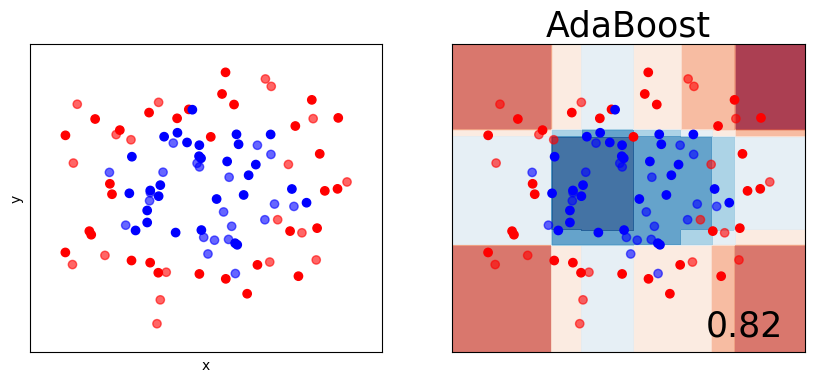

In [44]:
datasets = [adaset]
classifiers = [clf]
names = ["AdaBoost"]
figure(figsize=(10, 4))
classifier_model_fit_and_plot(datasets,classifiers,names,"25",true)

###  Task 3: Classify swiss_roll data with AdaBoost Classifier

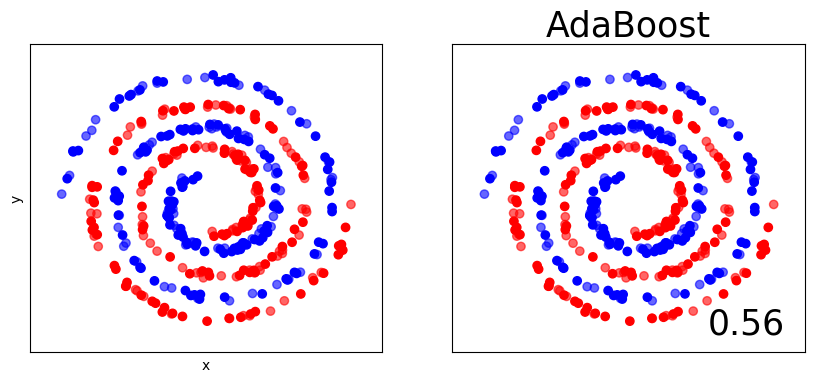

In [45]:
#Your code here
datasets = [(s_X,s_Y)]
figure(figsize=(10, 4))
classifier_model_fit_and_plot(datasets,classifiers,names,"25",true)

# Neural Networks

## Perceptrons

Artificial Neural Networks (ANN) or in short Neural Networks (NN) are inspired from actual <b>neurons</b> in nerve system. While a <b>neuron</b> can be activated with an input pulse signal, it responds non-linearly to this signal and produces an output signal or in other words value. 

In NNs, this idea is simplified to additive value description of inputs with a non-linear responce function ,which we call <b>activation function</b>. The building block of NNs is called <b>perceptrons</b> as show below.

<img src="img/perceptron.png" style="center"/>

Mathematically, a perceptron is defined with 

$$ y_{w,b}(x) = f(\sum_i^N x_iw_i + b_i)$$

In the example above, number of values in input vector $x$ is $N=3$ and $w$ values are the <b>weight</b> parameters with $b$ as the <b>bias weight</b> parameter. An optimization can be applied on <b>weights</b> and <b>bias weights</b> of the network according to the input vector and output target value(s). For simplicity, we can also call each perceptron connection (orange circle in Figure) a <b>node</b> as in graphs.


## Activation Functions

In the above equation, $f(x)$ function is the <b>activation function</b> and in general it is taken as the $tanh(x)$ function or a similar non-linear/switching function such as sigmoid function (Logistic) or Rectified Linear Unit (ReLU).

In [46]:
using Distributions
import Knet
import Images
@sk_import datasets: fetch_openml

PyObject <function fetch_openml at 0x7f36d27b4488>

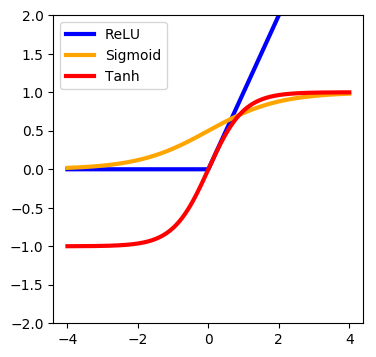

PyObject <matplotlib.legend.Legend object at 0x7f36cd8db780>

In [47]:
x = -4.0:0.01:4.0
figure(figsize=(4, 4))
plot(x,Knet.relu.(x), color="blue", linewidth=3)
plot(x,Knet.sigm.(x), color="orange", linewidth=3)
plot(x,tanh.(x), color="red", linewidth=3)
ylim((-2, 2))
legend(["ReLU","Sigmoid","Tanh"])

## Multi-Layer Perceptrons (MLP) aka Neural Networks

Using the building block perceptron, we can connect many nodes in multiple layers. When we connect perceptrons with many layers, this will be called Multi-Layer Perceptrons (MLPs) and in general Neural Networks are built on them. Examine the example below in figure.

<img src="img/nn.png" style="center"/>

Here, we build a neural network with <b>4</b> layers. The first layer at the left hand side is the <b>input layer</b> (blue spheres, nodes) and is the $x$ input vector of the model. At far right hand side, we have <b>output layer</b> (red spheres, nodes) where the model produces $y$ output values ,which are also the predictions of the model. In between these layers, there are two <b>hidden layers</b> that are full-connected to each other.

In equation form, the above network can be written as

$$ y_{w,b}(x) = f(\sum_i^N w_if(\sum_j^M x_jw_j + b_j) + b_i)$$

or in recursion equation form, this will be

$$ y_{w,b}^{k+1}(x) = f(\sum_i^{N_k} w_iy_i^{k} + b_i^{k})$$

where $k=0,...,2$ and $y^0=x$ and $y^2=y$.

While the input layer is also full-connected to each node of the hidden layer, the output layer is only connected to the outputs of each last hidden layer. This is because of the red arrow shows the connections hence the <b>weights</b> of each input, while the last output is just a sum over the output values of each hidden node. 

## Deep Networks and Deep Learning

Addition of multiple layers extend the flexibility of the neural networks to fit complex problems. Multiple hidden layers extend the capability of non-linear representation of the complex problem. Using this idea and pre-processing layers such as convolution of input values over non-dependent spacial dimensions and gradient back-propagation, deep neural networks could be constructed. These deep neural networks is shown that they can be used in image recognition very efficiently and very accurately. <b>Deep Learning</b> as a sub field of ML focus on these deep networks and their possible applications. 

For further reading about Deep Learning, here are some references: [Deep Learning](http://ufldl.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/), [Deep Convolutional Networks](http://deeplearning.net/tutorial/lenet.html#lenet)

## Auto Gradient of Functions with AutoGrad.jl (Knet includes this package) 

Let's try a simple example function to find the derivatives.

In [48]:
f(x) = cos.(x)

f (generic function with 1 method)

In [49]:
x = [0.0 pi/2.0 pi]

1×3 Array{Float64,2}:
 0.0  1.5708  3.14159

In [50]:
f(x)

1×3 Array{Float64,2}:
 1.0  6.12323e-17  -1.0

In [51]:
g = Knet.grad(f)

(::gradfun) (generic function with 1 method)

In [52]:
g(pi/2.0)

-1.0

In [53]:
-sin(pi/2.0)

-1.0

# Stochastic Gradient Descent (SGD)
In order to minimize/optimize $f$ <b>the loss (objective) function</b>, we consider the gradient descent (GD) with:

$$ x_{n+1}=x_{n}-\epsilon \widehat{\nabla f}_n(x_n)$$

where  
$$\mathbb{E}\widehat{\nabla f}_n(x)=\nabla f(x)$$

In each iteration of the gradient descent step, the optimization is carried-out on different sets of data hence the `weights` of the model is updated with respect to the selected random data set. Hence randomly selecting the $x_i$ values in the Gradient Descent is called Stochastic Gradient Descent (SGD).

In [54]:
nn_predict(w,x)=(w[1]*x.+w[2])

nn_loss(w,x,y)=(sum(abs2,y-nn_predict(w,x)) / size(x,2))

lossgradient = Knet.grad(nn_loss)

function nn_train(w, x, y; lr=.1, epochs=20)
    for epoch=1:epochs
        g = lossgradient(w, x, y)
        Knet.update!(w, g; lr=lr)
    end
    return w
end

function split_data_train_test(data; test=0)
    #@show size(data) # (506,14)
    x = data[:,1:13]
    y = data[:,14:14]
    x = (x .- mean(x,1)) ./ std(x,1) # Data normalization
    if test == 0
        xtrn = xtst = x
        ytrn = ytst = y
    else
        r = randperm(size(x,2))          # trn/tst split
        n = round(Int, (1-test) * size(x,2))
        xtrn=x[r[1:n],:]
        ytrn=y[r[1:n],:]
        xtst=x[r[n+1:end],:]
        ytst=y[r[n+1:end],:]
    end
    return (xtrn, ytrn, xtst, ytst)
end

split_data_train_test (generic function with 1 method)

In [55]:
function knet_main(data; test=0.8,epochs=20,lr=0.1)
    seed=-1 # random number seed: use a nonnegative int for repeatable results
    atype=Array{Float32}

    w = map(atype, [ 0.1*randn(1,13), 0.1*randn(1,1) ])
    (xtrn,ytrn,xtst,ytst) = map(atype, split_data_train_test(data; test=test))
    xtrn=xtrn'; ytrn=ytrn'; xtst=xtst'; ytst=ytst';
    report(epoch)=println((:epoch,epoch,:trn,nn_loss(w,xtrn,ytrn),:tst,nn_loss(w,xtst,ytst)))
    report(0)
    @time for epoch=1:epochs
        nn_train(w, xtrn, ytrn; lr=lr, epochs=1)
        report(epoch)
    end
    return w
end

knet_main (generic function with 1 method)

### Neural Networks for Regression. 
Here we will use NN for the regression using Boston Housing Dataset.

In [56]:
boston = DataFrames.readtable("boston.csv")
DataFrames.head(boston)

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax,PTRatio,Black,LStat,MedV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [57]:
mapper = DataFrameMapper([
        (:Crim, nothing),
        (:Zn, nothing),
        (:Indus, nothing),
        (:Chas, nothing),
        (:NOx, nothing),
        (:Rm, nothing),
        (:Age, nothing),
        (:Dis, nothing),
        (:Rad, nothing),
        (:Tax, nothing),
        (:PTRatio, nothing),
        (:Black, nothing),
        (:LStat, nothing),
        (:MedV, nothing)
        ])

boston_nn_data = fit_transform!(mapper, copy(boston))

506×14 Array{Float64,2}:
 0.00632  18.0   2.31  0.0  0.538  6.575  …  296.0  15.3  396.9    4.98  24.0
 0.02731   0.0   7.07  0.0  0.469  6.421     242.0  17.8  396.9    9.14  21.6
 0.02729   0.0   7.07  0.0  0.469  7.185     242.0  17.8  392.83   4.03  34.7
 0.03237   0.0   2.18  0.0  0.458  6.998     222.0  18.7  394.63   2.94  33.4
 0.06905   0.0   2.18  0.0  0.458  7.147     222.0  18.7  396.9    5.33  36.2
 0.02985   0.0   2.18  0.0  0.458  6.43   …  222.0  18.7  394.12   5.21  28.7
 0.08829  12.5   7.87  0.0  0.524  6.012     311.0  15.2  395.6   12.43  22.9
 0.14455  12.5   7.87  0.0  0.524  6.172     311.0  15.2  396.9   19.15  27.1
 0.21124  12.5   7.87  0.0  0.524  5.631     311.0  15.2  386.63  29.93  16.5
 0.17004  12.5   7.87  0.0  0.524  6.004     311.0  15.2  386.71  17.1   18.9
 0.22489  12.5   7.87  0.0  0.524  6.377  …  311.0  15.2  392.52  20.45  15.0
 0.11747  12.5   7.87  0.0  0.524  6.009     311.0  15.2  396.9   13.27  18.9
 0.09378  12.5   7.87  0.0  0.524  5.88

In [58]:
knet_main(boston_nn_data, test=0.0)

(:epoch, 0, :trn, 587.8517f0, :tst, 587.8517f0)
(:epoch, 1, :trn, 364.323f0, :tst, 364.323f0)
(:epoch, 2, :trn, 240.15706f0, :tst, 240.15706f0)
(:epoch, 3, :trn, 161.96634f0, :tst, 161.96634f0)
(:epoch, 4, :trn, 112.14006f0, :tst, 112.14006f0)
(:epoch, 5, :trn, 80.31886f0, :tst, 80.31886f0)
(:epoch, 6, :trn, 59.965015f0, :tst, 59.965015f0)
(:epoch, 7, :trn, 46.923744f0, :tst, 46.923744f0)
(:epoch, 8, :trn, 38.550343f0, :tst, 38.550343f0)
(:epoch, 9, :trn, 33.159607f0, :tst, 33.159607f0)
(:epoch, 10, :trn, 29.676716f0, :tst, 29.676716f0)
(:epoch, 11, :trn, 27.41559f0, :tst, 27.41559f0)
(:epoch, 12, :trn, 25.937948f0, :tst, 25.937948f0)
(:epoch, 13, :trn, 24.963589f0, :tst, 24.963589f0)
(:epoch, 14, :trn, 24.313234f0, :tst, 24.313234f0)
(:epoch, 15, :trn, 23.872078f0, :tst, 23.872078f0)
(:epoch, 16, :trn, 23.566534f0, :tst, 23.566534f0)
(:epoch, 17, :trn, 23.349371f0, :tst, 23.349371f0)
(:epoch, 18, :trn, 23.190233f0, :tst, 23.190233f0)
(:epoch, 19, :trn, 23.069574f0, :tst, 23.069574f0)


2-element Array{Array{Float32,2},1}:
 Float32[-0.662418 0.535046 … 0.897461 -3.36483]
 Float32[22.2744]                               

### Neural Network as a Classification Model

We will use MNIST Hand-Written Digits dataset to make predictions.


In [59]:
(X,y) = fetch_openml("mnist_784", version=1, return_X_y=true)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], PyCall.PyObject[PyObject '5', PyObject '0', PyObject '4', PyObject '1', PyObject '9', PyObject '2', PyObject '1', PyObject '3', PyObject '1', PyObject '4'  …  PyObject '7', PyObject '8', PyObject '9', PyObject '0', PyObject '1', PyObject '2', PyObject '3', PyObject '4', PyObject '5', PyObject '6'])

In [60]:
digits_data =convert(Array{Float32,4}, reshape(X,(70000,1,28,28)))
digits_y = [convert(String,y[n]) for n in 1:length(y)]
digits_targets = map(x->parse(Int64,x),digits_y)

70000-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [61]:
import Images

In [62]:
mnistview(x,i)=Images.colorview(Images.Gray,permutedims(x[i,1,:,:,1],(2,1)))

mnistview (generic function with 1 method)

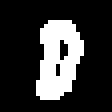

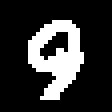

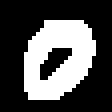

3-element Array{Int64,1}:
 0
 9
 0

In [63]:
rp = randperm(10000)
for i=1:3; display(mnistview(digits_data,rp[i])); end
display(digits_targets[rp[1:3]])

### Now, we will build our Neural Network with defining loss function (nll, negative log likelyhood) and optimize it.

In [64]:
function mnist_split_train_test(x,y,test)
    if test == 0.0
        xtrn = xtst = x
        ytrn = ytst = y
    else
        r = randperm(size(x,1))          # trn/tst split
        n = round(Int, (1-test) * size(x,1))
        xtrn=permutedims(x[r[1:n],:,:,:],(4,3,2,1))
        ytrn=y[r[1:n]]
        xtst=permutedims(x[r[n+1:end],:,:,:],(4,3,2,1))
        ytst=y[r[n+1:end]]
    end
    return (xtrn, ytrn, xtst, ytst)
end

mnist_split_train_test (generic function with 1 method)

In [65]:
function nnPredict(w,x)
    for i=1:2:length(w)
        x = w[i]*Knet.mat(x) .+ w[i+1]
        if i<length(w)-1
            x = Knet.relu.(x) # max(0,x)
        end
    end
    return x
end

# In newer versions of Julia (>0.7) the below function works.
#nnLoss(w,x,ygold) = Knet.nll(nnPredict(w,x),ygold)

# This is the same Knet.nll but in open, unhidden form
# Loss function with negative log likelihood (nll)
# Loss = -log(y'-y)
function nnLoss(w,x,ygold)
    ypred = nnPredict(w,x)
    ynorm = ypred .- log.(sum(exp.(ypred),1))
    return -sum(ygold .* ynorm) / size(ygold,2)
end

lossgradient = Knet.grad(nnLoss)

function nnAccuracy(w, dtst, pred=nnPredict)
    ncorrect = ninstance = nloss = 0
    for (x, ygold) in dtst
        ypred = pred(w, x)
        ynorm = ypred .- log.(sum(exp.(ypred),1))
        nloss += -sum(ygold .* ynorm)
        ncorrect += sum(ygold .* (ypred .== maximum(ypred,1)))
        ninstance += size(ygold,2)
    end
    return (ncorrect/ninstance, nloss/ninstance)
end

function nnTrain(w, dtrn; lr=.5, epochs=10)
    for epoch=1:epochs
        for (x,y) in dtrn
            g = lossgradient(w, x, y)
            Knet.update!(w,g;lr=lr)
        end
    end
    return w
end

function nnWeights(h...; atype=Array{Float32}, winit=0.1) 
    w = Any[]
    x=28*28
    for y in [h..., 10]
        push!(w, convert(atype, winit*randn(y,x)))
        push!(w, convert(atype, zeros(y, 1)))
        x = y
    end
    return w
end

function nnMinibatch(x, y, batchsize; atype=Array{Float32}, xrows=784, yrows=10, xscale=255)
    xbatch(a)=convert(atype, reshape(a./xscale, xrows, div(length(a),xrows)))
    ybatch(a)=(a[a.==0]=10;convert(atype, sparse(convert(Vector{Int},a),1:length(a),one(eltype(a)),yrows,length(a))))
    xcols = div(length(x),xrows)
    xcols == length(y) || throw(DimensionMismatch())
    data = Any[]
    for i=1:batchsize:xcols-batchsize+1
        j=i+batchsize-1
        push!(data, (xbatch(x[1+(i-1)*xrows:j*xrows]), ybatch(y[i:j])))
    end
    return data
end

function nnMain(data,targets,test_size,fast)
    seed=-1
    batchsize=100
    epochs=10
    hidden=[10]
    lr=0.05 # learning rate
    winit=0.1
    atype="Array{Float32}"
    gcheck=0
    
    seed > 0 && Knet.seed!(seed)
    atype = eval(Meta.parse(atype))
    w = nnWeights(hidden...; atype=atype, winit=winit)
    xtrn,ytrn,xtst,ytst = mnist_split_train_test(data,targets,test_size)
    global dtrn = nnMinibatch(xtrn, ytrn, batchsize; atype=atype)
    global dtst = nnMinibatch(xtst, ytst, batchsize; atype=atype)
    report(epoch)=println((:epoch,epoch,:trn,nnAccuracy(w,dtrn,nnPredict),:tst,nnAccuracy(w,dtst,nnPredict)))
    if fast > 0
        @time w = nnTrain(w, dtrn; lr=lr, epochs=epochs)
        report(epochs)
    else
        report(0)
        @time for epoch=1:epochs
            w = nnTrain(w, dtrn; lr=lr, epochs=1)
            report(epoch)
        end
    end
    return w
end


nnMain (generic function with 1 method)

### Let's train out NN with one hidden layer first.

In [66]:
nn_w = nnMain(digits_data,digits_targets,0.4,0);

(:epoch, 0, :trn, (0.11488095f0, 2.3001428f0), :tst, (0.11403571f0, 2.3007474f0))
(:epoch, 1, :trn, (0.85933334f0, 0.49713653f0), :tst, (0.8601429f0, 0.49329367f0))
(:epoch, 2, :trn, (0.8870952f0, 0.39544606f0), :tst, (0.8855357f0, 0.3938137f0))
(:epoch, 3, :trn, (0.8965f0, 0.3591529f0), :tst, (0.8962857f0, 0.35892096f0))
(:epoch, 4, :trn, (0.9032381f0, 0.33749646f0), :tst, (0.9029286f0, 0.33872354f0))
(:epoch, 5, :trn, (0.90738094f0, 0.32156613f0), :tst, (0.9069643f0, 0.32411978f0))
(:epoch, 6, :trn, (0.9120714f0, 0.3083358f0), :tst, (0.9103214f0, 0.3121614f0))
(:epoch, 7, :trn, (0.9156905f0, 0.2970277f0), :tst, (0.91321427f0, 0.30217546f0))
(:epoch, 8, :trn, (0.9187619f0, 0.28709683f0), :tst, (0.91592854f0, 0.29363078f0))
(:epoch, 9, :trn, (0.9210476f0, 0.2783886f0), :tst, (0.9175357f0, 0.28632486f0))
(:epoch, 10, :trn, (0.9234762f0, 0.27065977f0), :tst, (0.9201428f0, 0.2799167f0))
  5.901935 seconds (5.14 M allocations: 918.761 MiB, 8.30% gc time)


### Task 4: Change the hidden layer number and number of nodes in each layer.
### You may also change the learning rate and decrease it to 0.001 and also select a long training time with epoch=50
### Try fitting the NN with these parameters. Why the fitting is much better when we select more hidden layers and nodes? Can you answer this question?

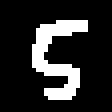

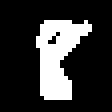

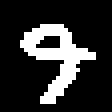

3-element Array{Int64,1}:
 5
 8
 9

In [67]:
rp = randperm(10000)
for i=1:3; display(mnistview(digits_data,rp[i])); end
display(digits_targets[rp[1:3]])

### Since we trained out Neural Network to predict the Digit, let's try it a shot!

### Do outputs match with the target digits above?

In [68]:
for i=1:3; println(findmax(nnPredict(nn_w,permutedims(digits_data[rp[i],:,:,:],(3,2,1))))[2]); end

8
8
9


### Study Topics:
1. Use Neural Networks to build an `Autopilot` for **Mars Lander** in previous lectures [L4-N-Body-Problem](L4-N-Body-Problem.ipynb).
2. Use data from `Student Performance in Exams` in [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) and cluster the data using `Classification Models` according to different features. You may answer whether the following has any effect on the exam scores: the student had a lunch before the exam, took exam preperation courses or their parental level of education.
3. How about prediction of customer transactions from the bank in the following [Santender Kaggle Competition](https://www.kaggle.com/c/santander-customer-transaction-prediction) 

### Further Reading:
1. **Autoencoder neural networks** in unsupervised learning. [Tutorial on Autoencoders at Stanford University](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/)
2. **Self-Orginized Maps (SOM)** for clustering data in unsupervised learning. [AI-Junkie SOM Tutorial](http://www.ai-junkie.com/ann/som/som5.html)